<a href="https://colab.research.google.com/github/Atrideau/hello-world/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des Librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score

# Fonction

In [ ]:
def indexSup(str0) : #cherche l'index des xxxxxxxx ou des ********
    if (("xx" in str0) and ("**" in str0)) : 
        return min(str0.index('xx') , str0.index('**'))
    elif 'xx' in str0 : 
        return str0.index("xx")
    elif '**' in str0 : 
        return str0.index("**")
    return len(str0)

def extract(str0) : #renvoie le message d'erreur nettoyé
    if ':' in str0 : 
        return str0[str0.index(':')+1 : indexSup(str0)]
    return str0[: indexSup(str0)]

In [ ]:
extract("coucou : test ***")

' test '

# Chargement des Datasets

In [26]:
data = pd.read_csv('/content/testData.csv', sep=';')
# df = pd.read_csv('/content/tfidf.csv')  # data from NLP
# truedataset = pd.read_csv('/content/file.csv', on_bad_lines='skip', sep=';')

In [27]:
print(data.head())
print(data.shape)

   INCIDENT   STATUT                                        DESIGNATION  \
0    639492  Archivé  #ADMINISTRATION/COMPTE/REINITIALISATION MOT DE...   
1    644449  Archivé                    #MATERIEL/TELEPHONIE/CISCO WIFI   
2    645665  Archivé                    #MATERIEL/TELEPHONIE/CISCO WIFI   
3    651210  Archivé                            #MATERIEL/TELEPHONIE/IP   
4    655283  Archivé                    #MATERIEL/TELEPHONIE/CISCO WIFI   

   CODE_PRODUIT               DESIGNATION_PRODUIT  CODE_EQUIPEMENT  \
0           NaN                               NaN          11267.0   
1      454308.0        LECTEUR MINI FLASH USB LK2         216315.0   
2           NaN                               NaN          63080.0   
3           NaN                               NaN          63110.0   
4      334897.0  DOUCHETTE DATALOGIC TOUCH 90 PRO         190848.0   

    DESIGNATION_EQUIPEMENT  CODE_APP DESIGNATION_APP  \
0         OPTIPLEX 3020SFF    1344.0      ADMINTOOLS   
1               

In [ ]:
print(df.head())
print(df.shape)

   Unnamed: 0   ab  abeoisn  abeosi  abeosin  aberration  abesoin  abimer  \
0       22200  0.0      0.0     0.0      0.0         0.0      0.0     0.0   
1       22201  0.0      0.0     0.0      0.0         0.0      0.0     0.0   
2       22202  0.0      0.0     0.0      0.0         0.0      0.0     0.0   
3       22203  0.0      0.0     0.0      0.0         0.0      0.0     0.0   
4       22204  0.0      0.0     0.0      0.0         0.0      0.0     0.0   

   abimé  abimés  ...  éventuellement  éviter  évoluer  évolution  évoqu  \
0    0.0     0.0  ...             0.0     0.0      0.0        0.0    0.0   
1    0.0     0.0  ...             0.0     0.0      0.0        0.0    0.0   
2    0.0     0.0  ...             0.0     0.0      0.0        0.0    0.0   
3    0.0     0.0  ...             0.0     0.0      0.0        0.0    0.0   
4    0.0     0.0  ...             0.0     0.0      0.0        0.0    0.0   

   événement  éxecuter  éxpirer  éxterieur      être  
0        0.0       0.0   

# Data Processing

suppression des colonnes inutiles

In [28]:
# data = data[data['Unnamed: 12'].isna()]
# data = data.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])

# low correlation or redundancy
data.drop("CODE_PRODUIT", axis=1, inplace=True)
data.drop("DESIGNATION_PRODUIT", axis=1, inplace=True)
data.drop("STATUT", axis=1, inplace=True)
data.drop("DESIGNATION_EQUIPEMENT", axis=1, inplace=True)
data.drop("DESIGNATION_APP", axis=1, inplace=True) #red

In [ ]:
# truedataset = truedataset[truedataset['Unnamed: 12'].isna()]
# truedataset = truedataset.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'])

# # low correlation or redundancy
# truedataset.drop("CODE_PRODUIT", axis=1, inplace=True)
# truedataset.drop("DESIGNATION_PRODUIT", axis=1, inplace=True)
# truedataset.drop("STATUT", axis=1, inplace=True)
# truedataset.drop("DESIGNATION_EQUIPEMENT", axis=1, inplace=True)
# truedataset.drop("DESIGNATION_APP", axis=1, inplace=True) #red

NameError: ignored

recupération de la derniere partie de la branche des différentes arborescences de la feature 'DESIGNATION'

In [29]:
data['DESIGNATION'] = data['DESIGNATION'].str.upper().str.split('/').str[-1]
#data['DESIGNATION'] = data['DESIGNATION'].str.upper()

In [ ]:
# truedataset['DESIGNATION'] = truedataset['DESIGNATION'].str.upper().str.split('/').str[-1]

suppression des choses inutiles de l'enoncé du probleme

In [30]:
data.reset_index(inplace=True, drop=True)
data['ENONCE_PROBLEME_P'] = data.apply(lambda x: extract(str(x['ENONCE_PROBLEME_P'])),axis=1)

In [ ]:
# truedataset.reset_index(inplace=True, drop=True)
# truedataset['ENONCE_PROBLEME_P'] = truedataset.apply(lambda x: extract(str(x['ENONCE_PROBLEME_P'])),axis=1)

In [31]:
print(data)

       INCIDENT               DESIGNATION  CODE_EQUIPEMENT  CODE_APP  \
0        639492                  DELTANET          11267.0    1344.0   
1        644449                CISCO WIFI         216315.0       0.0   
2        645665                CISCO WIFI          63080.0       0.0   
3        651210                        IP          63110.0       0.0   
4        655283                CISCO WIFI         190848.0       0.0   
...         ...                       ...              ...       ...   
14573    828797  COMPTE @, DELTANET, UNIX         274171.0       0.0   
14574    828806         DYSFONCTIONNEMENT         458807.0   12486.0   
14575    828834                  CODE PIN         285471.0   12777.0   
14576    828854                  COMPTE @         192024.0       0.0   
14577    828893                       SON         247934.0       0.0   

                  NOMENCLATURE_PROBLEME  \
0                        Acces, Comptes   
1                            Telephonie   
2     

Recuperation du mot caracterisant le mieux le probleme décrit par le createur du ticket

In [ ]:
Cle = df[["Unnamed: 0"]].copy()  #new dataset
df = df.drop("Unnamed: 0", axis=1)   #search max value without index

maxValueIndex = df.idxmax(axis = 1)

Cle['Topic'] = maxValueIndex  #add a new column to the new dataset
Cle.rename(columns={"Unnamed: 0": "INCIDENT"}, inplace=True)  #rename column for merge

In [9]:
data = pd.concat([data, Cle], axis=1, join="inner")  
data = data.drop("INCIDENT", axis=1)  #useless for training
#data = data.drop("Unnamed: 0", axis=1)
print(data)

NameError: ignored

Remplacement de toutes les valeurs (chiffrées ou non) par des int allant de 1 au nombre d'elements différents dans la colonne (Méthode de groooooos bourrin)

In [32]:
for i in data.columns :
  data[i] = data[i].fillna(0)
  n=1
  for j in data[i].unique() :
    data.loc[data[i]==j,i]=n
    n+=1
  data[i] = data[i].astype(int)

# Matrice de correlation

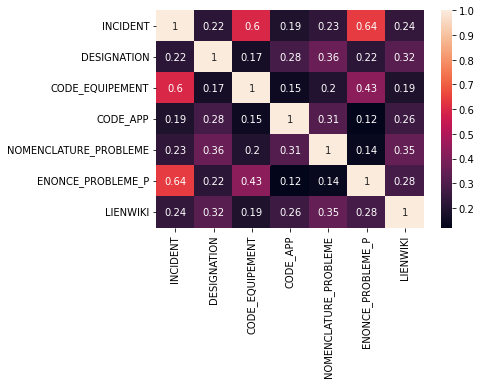

In [33]:
matrice_corr = data.corr().round(2)
sns.heatmap(data=matrice_corr, annot=True)

# Creation du modele

slip du dataset pour entrainement et test du modele

In [34]:
train, test = train_test_split(data, test_size=0.2)
# train, test = train_test_split(data, test_size=0)


Ytrain = train[["LIENWIKI"]]
Xtrain = train.drop("LIENWIKI", axis=1)

Ytest = test[["LIENWIKI"]]              #A commenter 
Xtest = test.drop("LIENWIKI", axis=1) #A commenter 

# Récupérer 


entrainement et prediction

In [35]:
model = RandomForestClassifier(min_samples_leaf=3, criterion='gini')
model.fit(Xtrain, Ytrain)
prediction = model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Calcul Top 3 des prédictions

In [36]:
pred_proba = model.predict_proba(Xtest)
top3 = np.zeros((pred_proba.shape[0],3))

for irow, row in enumerate(pred_proba):
  top3[irow] = np.argsort(row)[-3:] + 1
# print(top3)
# print(prediction)
# print((Ytest['LIENWIKI'].to_numpy() == prediction).sum())
# print((top3 == prediction).sum())

Fonction de calcul de précision

In [15]:
def precision_top3(Ytest_numpy, top3):
  count =0
  for index, test in enumerate(Ytest_numpy):
    # print(test, top3[index])
    if test in top3[index]:
      count +=1
      # print('count')
  return count/Ytest_numpy.shape[0]

calcul de metric

In [37]:
accuracy_score(Ytest, prediction)

0.921124828532236

In [38]:
precision_score(Ytest, prediction, average='micro')

0.921124828532236

In [39]:
precision_top3(Ytest['LIENWIKI'].to_numpy(), top3)

0.9735939643347051

Plot des features importance

<BarContainer object of 7 artists>

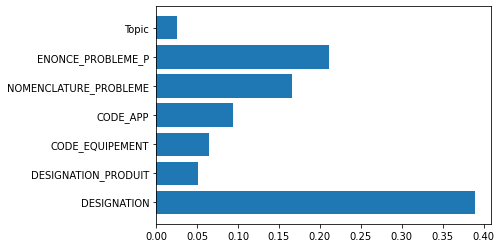

In [ ]:
plt.barh(Xtrain.columns, model.feature_importances_)

# Fonction non utilisées dans ce code

In [ ]:
def MsgErreur(string) : 
  if ("xx" in string) and ("**" in string) :
    Break = min(string.index("xx"),string.index("**"))
    DescTicket = string[:Break]
  elif ("xx" in string) and ("**" not in string):
    Break = string.index("xx")
    DescTicket = string[:Break]
  elif ("xx" not in string) and ("**" in string):
    Break = string.index("**")
    DescTicket = string[:Break]
  else: 
    DescTicket = string
    
  return DescTicket